In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# run pip install aif360
from aif360.sklearn.datasets import fetch_adult
from sklearn.model_selection import train_test_split
from sklearn import tree
from collections import Counter
from sklearn.metrics import accuracy_score


In [68]:
# For viewing
adult_view = fetch_adult()
adult_parameters_view = adult_view.X
adult_income_view = adult_view.y

## Filtering view data to match numerical data
columns = ["age", "education", "race", "sex", "capital-gain", "capital-loss",	"hours-per-week"]
adult_parameters_view = adult_parameters_view.filter(items=columns)

# For use in model
adult = fetch_adult(numeric_only=True)
adult_parameters = adult.X
adult_income = adult.y

In [69]:
display(adult_parameters_view)

age     education   race     sex  capital-gain  \
race      sex                                                       
Non-white Male    25.0          11th  Black    Male           0.0   
White     Male    38.0       HS-grad  White    Male           0.0   
          Male    28.0    Assoc-acdm  White    Male           0.0   
Non-white Male    44.0  Some-college  Black    Male        7688.0   
White     Male    34.0          10th  White    Male           0.0   
...                ...           ...    ...     ...           ...   
          Female  27.0    Assoc-acdm  White  Female           0.0   
          Male    40.0       HS-grad  White    Male           0.0   
          Female  58.0       HS-grad  White  Female           0.0   
          Male    22.0       HS-grad  White    Male           0.0   
          Female  52.0       HS-grad  White  Female       15024.0   

                  capital-loss  hours-per-week  
race      sex                                   
Non-white Male             0.0            40.0  
White     Male             0.0            50.0  
          Male             0.0            40.0  
Non-white Male             0.0            40.0  
White     Male             0.0            30.0  
...                        ...             ...  
          Female           0.0            38.0  
          Male             0.0            40.0  
          Female           0.0            40.0  
          Male             0.0            20.0  
          Female           0.0            40.0  

[45222 rows x 7 columns]

In [70]:
display(adult_parameters)

age  education-num  race  sex  capital-gain  capital-loss  \
race sex                                                               
0    1    25.0            7.0     0    1           0.0           0.0   
1    1    38.0            9.0     1    1           0.0           0.0   
     1    28.0           12.0     1    1           0.0           0.0   
0    1    44.0           10.0     0    1        7688.0           0.0   
1    0    18.0           10.0     1    0           0.0           0.0   
...        ...            ...   ...  ...           ...           ...   
     0    27.0           12.0     1    0           0.0           0.0   
     1    40.0            9.0     1    1           0.0           0.0   
     0    58.0            9.0     1    0           0.0           0.0   
     1    22.0            9.0     1    1           0.0           0.0   
     0    52.0            9.0     1    0       15024.0           0.0   

          hours-per-week  
race sex                  
0    1              40.0  
1    1              50.0  
     1              40.0  
0    1              40.0  
1    0              30.0  
...                  ...  
     0              38.0  
     1              40.0  
     0              40.0  
     1              20.0  
     0              40.0  

[48842 rows x 7 columns]

In [71]:
X = adult_parameters.values
y = adult_income.values
print(X.shape, y.shape)
Xy = np.append(adult_parameters.values, adult_income.values[:, None], axis=1)
print(Xy.shape)

(48842, 7) (48842,)
(48842, 8)


In [72]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X, y)

[Text(1135.9285714285713, 489.24, 'capital-gain <= 5119.0\ngini = 0.364\nsamples = 48842\nvalue = [37155, 11687]\nclass = <$50k'),
 Text(637.7142857142857, 380.52000000000004, 'education <= 12.5\ngini = 0.325\nsamples = 46510\nvalue = [37031, 9479]\nclass = <$50k'),
 Text(318.85714285714283, 271.8, 'age <= 30.5\ngini = 0.239\nsamples = 35726\nvalue = [30780, 4946]\nclass = <$50k'),
 Text(159.42857142857142, 163.08000000000004, 'age <= 24.5\ngini = 0.066\nsamples = 12944\nvalue = [12499, 445]\nclass = <$50k'),
 Text(79.71428571428571, 54.360000000000014, 'gini = 0.013\nsamples = 7645\nvalue = [7594, 51]\nclass = <$50k'),
 Text(239.1428571428571, 54.360000000000014, 'gini = 0.138\nsamples = 5299\nvalue = [4905, 394]\nclass = <$50k'),
 Text(478.2857142857142, 163.08000000000004, 'sex <= 0.5\ngini = 0.317\nsamples = 22782\nvalue = [18281, 4501]\nclass = <$50k'),
 Text(398.57142857142856, 54.360000000000014, 'gini = 0.15\nsamples = 7233\nvalue = [6642, 591]\nclass = <$50k'),
 Text(558.0, 54

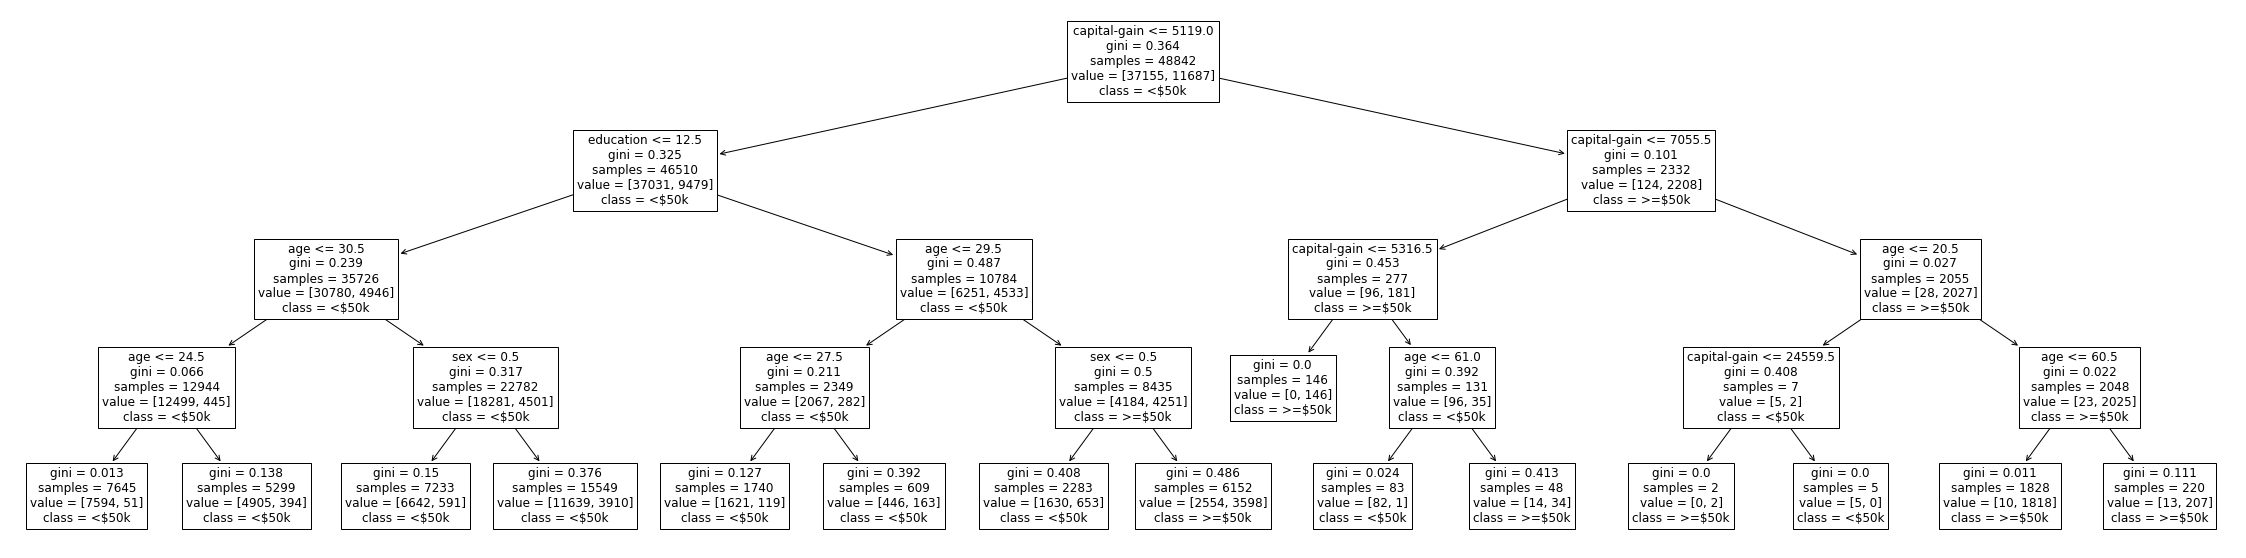

In [73]:
plt.figure(figsize=(40,10))
tree.plot_tree(clf, fontsize=12, feature_names=columns, class_names=["<$50k",">=$50k"])

In [74]:
class Node:
    def __init__(self, leaf=None, feature=None, threshold=None, greater_node=None, less_node=None, gain=None, value=None):
        self.leaf = leaf
        self.feature = feature
        self.threshold = threshold
        self.greater_node = greater_node
        self.less_node = less_node
        self.data = []
        self.height = None
        self.gain = gain
        self.value = value
        self.unique_id = np.random.random((1))[0]
    
    def add_greater_node(self, greater_node):
        self.greater_node = greater_node

    def add_less_node(self, less_node):
        self.less_node = less_node
    
    def is_leaf(self):
        return self.leaf != None

    def __repr__(self):
        if self.is_leaf():
            return "{class="+str(self.leaf)+"}"
        return "{<="+str(self.threshold)+":"+str(self.less_node)+",>"+str(self.threshold)+":"+str(self.greater_node)+"}"
    
    def __str__(self):
        if self.is_leaf():
            return "{class="+str(self.leaf)+"}"
        return "{<="+str(self.threshold)+":"+str(self.less_node)+",>"+str(self.threshold)+":"+str(self.greater_node)+"}"
    
    def export_json(self):
        if self.is_leaf():
            return {"class":self.leaf}
        return {str(self.feature)+"<="+str(self.threshold):self.less_node.export_json(), str(self.feature)+">"+str(self.threshold):self.greater_node.export_json()}
    
    def add_data(self, data):
        if not self.is_leaf():
            if data[self.feature] <= self.threshold:
                leaf = self.less_node.add_data(data)
            else:
                leaf = self.greater_node.add_data(data)
            data = np.append(data, leaf)
            self.data.append(data)
            return leaf
        else:
            data = np.append(data, self.leaf)
            self.data.append(data)
            return self.leaf

    
    def get_leafs(self):
        if self.is_leaf():
            return [self]
        leafs = []
        leafs.extend(self.less_node.get_leafs())
        leafs.extend(self.greater_node.get_leafs())
        return leafs

    def get_accuracy(self, index=None, value=None):
        if self.is_leaf():
            correct = 0
            total = 0
            for data in self.data:
                if index==None:
                    correct+=data[-1] == self.leaf
                    total+=1
                elif data[index] == value:
                    correct+=data[-1] == self.leaf
                    total+=1
            if total == 0:
                print('no matches for index:',index,'value:',value)
                return -1
            return correct/total
        
        print("not a leaf")
        return -1

    def get_prediction(self, data):
        if self.is_leaf():
            return self.leaf
        else:
            if data[self.feature] <= self.threshold:
                return self.less_node.get_prediction(data)
            else:
                return self.greater_node.get_prediction(data)
    
    def relabel(self):
        if self.is_leaf():
            self.leaf = [1.0,0.0][round(self.leaf)]
        else:
            print("not a leaf")

    def flip_nodes(self):
        if self.is_leaf():
            print("is leaf")
        else:
            temp = self.greater_node
            self.greater_node = self.less_node
            self.less_node = temp
            self.reset_data()

    def get_height(self):
        if self.height != None:
            return self.height
        elif self.is_leaf():
            return 0
        else:
            return max(self.less_node.get_height(), self.greater_node.get_height()) + 1

    def get_layer(self, height):
        if self.get_height() == height:
            return [self]
        elif self.get_height() < height:
            return []
        else:
            temp = self.less_node.get_layer(height)
            temp.extend(self.greater_node.get_layer(height))
            return temp

    def reset_data(self):
        if self.is_leaf():
            self.data = []
        else:
            self.less_node.reset_data()
            self.greater_node.reset_data()

    def copy(self):
        if self.is_leaf():
            copy = Node(self.leaf, self.feature, self.threshold)
            return copy
        else:
            copy = Node(self.leaf, self.feature, self.threshold)
            if self.less_node != None:
                copy.add_greater_node(self.greater_node.copy())
            if self.greater_node != None:
                copy.add_less_node(self.less_node.copy())
            return copy

    def relabel_acc(self):
        if self.is_leaf():
            if self.data != []:
                self.leaf = round(np.average(np.array(self.data)[:,-1]))
        else:
            if self.less_node != None:
                self.less_node.relabel_acc()
            if self.greater_node != None:
                self.greater_node.relabel_acc()

    def discrimination(self, discriminatory_index):
        return discrimination(self.data, discriminatory_index)

    def accuracy(self):
        return accuracy(self.data)

    def get_bad_nodes(self, comp, discriminatory_index, stats=False):
        bad_nodes = []
        if comp == None:
            comp = self.discrimination(discriminatory_index)
        if (self.less_node.is_leaf() and self.discrimination(discriminatory_index) < comp) or (not self.less_node.is_leaf() and self.less_node.discrimination(discriminatory_index) < comp):
            if (self.greater_node.is_leaf() and self.discrimination(discriminatory_index) < comp) or (not self.greater_node.is_leaf() and self.greater_node.discrimination(discriminatory_index) < comp):
                # RETRAIN sub tree
                if stats:
                    print("retrain node:\n"+str(self))
                    print("discrimination:", self.discrimination(discriminatory_index))
                    print("accuracy", self.accuracy())
                return [self]
        if not self.less_node.is_leaf():
            bad_nodes.extend(self.less_node.get_bad_nodes(comp, discriminatory_index))
        if not self.greater_node.is_leaf():
            bad_nodes.extend(self.greater_node.get_bad_nodes(comp, discriminatory_index))
        return bad_nodes

    def retrain_node(self, depth=None, stats=False):
        if depth == None:
            depth = self.get_height()
        fair_model = DecisionTreeFair(max_depth=depth-1)
        data = np.array(self.data)
        fair_model.fit(data[:,:-2], data[:,-2], 3)
        if stats:
            print(fair_model.get_nodes())
            fair_preds = fair_model.predict(data[:,:-2])
            print('accuracy',accuracy_score(data[:,-2], fair_preds))
            xyz_fair = np.append(data[:,:-2], data[:,-2][:,None], axis=1)
            xyz_fair = np.append(xyz_fair, np.array(fair_preds)[:,None], axis=1)
            print('discrimination', avg_statParity_equalOdds(xyz_fair, 3))
        return fair_model.get_nodes()
    
    def get_parent(self, unique_id, height=None):
        if self.is_leaf():
            return None
        elif height != None:
            potential_parents = self.get_layer(height)
            for parent in potential_parents:
                if parent.less_node.unique_id == unique_id or parent.greater_node.unique_id == unique_id:
                    return parent                
        elif self.less_node.unique_id == unique_id or self.greater_node.unique_id == unique_id:
            return self
        else:
            less_node = self.less_node.get_parent(unique_id)
            if less_node != None:
                return less_node
            greater_node = self.greater_node.get_parent(unique_id)
            if greater_node != None:
                return greater_node
        return None
    
    def replace_child(self, unique_id, node):
        if self.less_node.unique_id == unique_id:
            self.less_node = node
        elif self.greater_node.unique_id == unique_id:
            self.greater_node = node

In [75]:
class DecisionTreeFair:
    '''
    Class which implements a decision tree classifier algorithm.
    '''
    def __init__(self, min_samples_split=2, max_depth=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None
        
    @staticmethod
    def _entropy(s):
        '''
        Helper function, calculates entropy from an array of integer values.
        
        :param s: list
        :return: float, entropy value
        '''
        # Convert to integers to avoid runtime errors
        counts = np.bincount(np.array(s, dtype=np.int64))
        # Probabilities of each class label
        percentages = counts / len(s)

        # Caclulate entropy
        entropy = 0
        for pct in percentages:
            if pct > 0:
                entropy += pct * np.log2(pct)
        return -entropy
    
    def _statisticalParity(self, left_child, right_child, left_pred, right_pred, protectedIndex):
        left_child = np.insert(left_child, -1, left_pred, axis=1)
        right_child = np.insert(right_child, -1, right_pred, axis=1)
        data = np.append(left_child, right_child, axis=0)
        protectedClass = data[np.where(data[:,protectedIndex]==0)]
        elseClass = data[np.where(data[:,protectedIndex]!=0)]
    
        if len(protectedClass) == 0 or len(elseClass) == 0:
            # print("protectedClass or elseClass is empty")
            return -1
        else:
            protectedProb = np.count_nonzero(protectedClass[:,-1]) / len(protectedClass)
            elseProb = np.count_nonzero(elseClass[:,-1]) / len(elseClass)
    
        statParity = protectedProb-elseProb

        protectedClass = protectedClass[np.where(protectedClass[:,-1]==protectedClass[:,-2])]
        elseClass = elseClass[np.where(elseClass[:,-1]==elseClass[:,-2])]
    
        if len(protectedClass) == 0 or len(elseClass) == 0:
            # print("protectedClass or elseClass is empty")
            return -1
        else:
            protectedProb = np.count_nonzero(protectedClass[:,-1]) / len(protectedClass)
            elseProb = np.count_nonzero(elseClass[:,-1]) / len(elseClass)

        equalOdds = protectedProb-elseProb
        # if left_pred!=right_pred:
        #     print('disc', protectedClass[:,[protectedIndex, -2, -1]], elseClass[:,[protectedIndex, -2, -1]])

        return (equalOdds + statParity)/2

    def _information_gain(self, parent, left_child, right_child):
        '''
        Helper function, calculates information gain from a parent and two child nodes.
        
        :param parent: list, the parent node
        :param left_child: list, left child of a parent
        :param right_child: list, right child of a parent
        :return: float, information gain
        '''
        num_left = len(left_child) / len(parent)
        num_right = len(right_child) / len(parent)
        
        # One-liner which implements the previously discussed formula
        return self._entropy(parent) - (num_left * self._entropy(left_child) + num_right * self._entropy(right_child))
    
    def _best_split(self, X, y, protected_index):
        '''
        Helper function, calculates the best split for given features and target
        
        :param X: np.array, features
        :param y: np.array or list, target
        :return: dict
        '''
        best_split = {}
        best_gain = -float('inf')
        best_info_gain = 0
        best_discrimination = 0
        n_rows, n_cols = X.shape
        
        # For every dataset feature
        for f_idx in range(n_cols):
            X_curr = X[:, f_idx]
            # For every unique value of that feature
            for threshold in np.unique(X_curr):
                # Construct a dataset and split it to the left and right parts
                # Left part includes records lower or equal to the threshold
                # Right part includes records higher than the threshold
                df = np.concatenate((X, y.reshape(1, -1).T), axis=1)
                df_left = np.array([row for row in df if row[f_idx] <= threshold])
                df_right = np.array([row for row in df if row[f_idx] > threshold])

                # Do the calculation only if there's data in both subsets
                if len(df_left) > 0 and len(df_right) > 0:
                    # Obtain the value of the target variable for subsets
                    y = df[:, -1]
                    y_left = df_left[:, -1]
                    y_right = df_right[:, -1]

                    pred_left = np.average(y_left) > 0.5
                    pred_right = np.average(y_right) > 0.5


                    sensitivity = df[:, protected_index]
                    sensitivity_left = df_left[:, protected_index]
                    sensitivity_right = df_right[:, protected_index]

                    # Caclulate the information gain and save the split parameters
                    # if the current split if better then the previous best
                    info_gain = self._information_gain(y, y_left, y_right)
                    # sensitivity_gain = self._information_gain(sensitivity, sensitivity_left, sensitivity_right)
                    discrimination = self._statisticalParity(df_left, df_right, pred_left, pred_right, protected_index)
                    gain = (info_gain + discrimination + 1)/2
                    # print(info_gain, discrimination, gain)
                    if gain > best_gain:
                        best_split = {
                            'feature_index': f_idx,
                            'threshold': threshold,
                            'df_left': df_left,
                            'df_right': df_right,
                            'gain': gain
                        }
                        best_gain = gain
                        best_info_gain = info_gain
                        best_discrimination = discrimination
                        # print('temp:',best_split['feature_index'],int(best_split['threshold']),'\t', best_gain, best_info_gain, best_discrimination, pred_left==pred_right)
        # print(best_split['feature_index'],int(best_split['threshold']),'\t', best_gain, best_info_gain, best_discrimination)
        return best_split
    
    def _build(self, X, y, sensitive_index, depth=0):
        '''
        Helper recursive function, used to build a decision tree from the input data.
        
        :param X: np.array, features
        :param y: np.array or list, target
        :param depth: current depth of a tree, used as a stopping criteria
        :return: Node
        '''
        n_rows, n_cols = X.shape
        
        # Check to see if a node should be leaf node
        if n_rows >= self.min_samples_split and depth <= self.max_depth:
            # Get the best split
            best = self._best_split(X, y, sensitive_index)
            # If the split isn't pure
            if best['gain'] > 0:
                # Build a tree on the left
                left = self._build(
                    X=best['df_left'][:, :-1], 
                    y=best['df_left'][:, -1], 
                    sensitive_index=sensitive_index,
                    depth=depth + 1
                )
                right = self._build(
                    X=best['df_right'][:, :-1], 
                    y=best['df_right'][:, -1], 
                    sensitive_index=sensitive_index,
                    depth=depth + 1
                )
                return Node(
                    feature=best['feature_index'], 
                    threshold=best['threshold'], 
                    less_node=left, 
                    greater_node=right, 
                    gain=best['gain']
                )
        # Leaf node - value is the most common target value 
        return Node(
            leaf=Counter(y).most_common(1)[0][0]
        )
    
    def fit(self, X, y, sensitive_index):
        '''
        Function used to train a decision tree classifier model.
        
        :param X: np.array, features
        :param y: np.array or list, target
        :return: None
        '''
        # Call a recursive function to build the tree
        self.root = self._build(X, y, sensitive_index)
        
    def _predict(self, x, tree):
        '''
        Helper recursive function, used to predict a single instance (tree traversal).
        
        :param x: single observation
        :param tree: built tree
        :return: float, predicted class
        '''
        # Leaf node
        if tree.leaf != None:
            return tree.leaf
        feature_value = x[tree.feature]
        
        # Go to the left
        if feature_value <= tree.threshold:
            return self._predict(x=x, tree=tree.less_node)
        
        # Go to the right
        if feature_value > tree.threshold:
            return self._predict(x=x, tree=tree.greater_node)
        
    def predict(self, X):
        '''
        Function used to classify new instances.
        
        :param X: np.array, features
        :return: np.array, predicted classes
        '''
        # Call the _predict() function for every observation
        return [self._predict(x, self.root) for x in X]

    def get_nodes(self):
        return self.root

In [76]:
def export_dict(clf):
    return export_dict_rec(tree.export_text(clf)[0:-1])
def export_dict_rec(tree_text):
    if tree_text[0:12] == "|--- class: " or tree_text.find("feature") == -1:
        return Node(float(tree_text[12:]), None, None)
    tree_text = tree_text.replace("|--- feature_", "", 1)
    tree_text = tree_text.replace("\n|--- feature_", "\n", 1)
    tree_text = tree_text.replace("\n|   ", "\n")
    features = []
    feature = ""
    for letter in tree_text:
        if letter == " " or letter == "\n":
            features.append(feature)
            feature = ""
            if letter == "\n":
                break
        else:
            feature+=letter
    start = tree_text.find("\n")
    start_end = tree_text.find("\n"+tree_text[0])
    end = start_end+tree_text[start_end:].find("\n|")
    tree = Node(None, int(features[0]), float(features[-1]))
    tree.add_less_node(export_dict_rec(tree_text[start+1:start_end]))
    tree.add_greater_node(export_dict_rec(tree_text[end+1:]))
    return tree




In [77]:
tree_dict = export_dict(clf)
print(tree_dict.export_json())

{'4<=5119.0': {'1<=12.5': {'0<=30.5': {'0<=24.5': {'class': 0.0}, '0>24.5': {'class': 0.0}}, '0>30.5': {'3<=0.5': {'class': 0.0}, '3>0.5': {'class': 0.0}}}, '1>12.5': {'0<=29.5': {'0<=27.5': {'class': 0.0}, '0>27.5': {'class': 0.0}}, '0>29.5': {'3<=0.5': {'class': 0.0}, '3>0.5': {'class': 1.0}}}}, '4>5119.0': {'4<=7055.5': {'4<=5316.5': {'class': 1.0}, '4>5316.5': {'0<=61.0': {'class': 0.0}, '0>61.0': {'class': 1.0}}}, '4>7055.5': {'0<=20.5': {'4<=24559.5': {'class': 1.0}, '4>24559.5': {'class': 0.0}}, '0>20.5': {'0<=60.5': {'class': 1.0}, '0>60.5': {'class': 1.0}}}}}


In [78]:
for data in Xy:
    tree_dict.add_data(data)
leafs = tree_dict.get_leafs()
print(leafs)

[{class=0.0}, {class=0.0}, {class=0.0}, {class=0.0}, {class=0.0}, {class=0.0}, {class=0.0}, {class=1.0}, {class=1.0}, {class=0.0}, {class=1.0}, {class=1.0}, {class=0.0}, {class=1.0}, {class=1.0}]


In [79]:
def relabel_stats(leaf, discriminatory_index, X):
    b = np.sum(X[:,discriminatory_index])
    b_bar = X.shape[0]-b
    data = np.array(leaf.data)
    p = np.average(data[:,-1])
    n = 1-np.average(data[:,-1])
    delta_accuracy = n-p
    uv = np.count_nonzero(data[:,discriminatory_index] == 1)
    wx = np.count_nonzero(data[:,discriminatory_index] == 0)
    delta_discrimination = uv/b - wx/b_bar
    if p>n:
        return delta_accuracy, delta_discrimination
    return -delta_accuracy, -delta_discrimination


In [80]:
print(relabel_stats(leafs[-2], 2, X))

(-1.0, 0.011890536824626614)


In [81]:
z = np.array([tree_dict.get_prediction(data) for data in Xy])
Xyz = np.append(Xy, z[:,None], axis=1)

In [82]:
female = 0
female_rich = 0
female_poor = 0
male = 0
male_rich = 0
male_poor = 0
for datum in Xyz:
    if datum[3] == 1:
        male += 1
        if datum[-2]==1:
            male_rich+=1
        else:
            male_poor+=1
    else:
        female += 1
        if datum[-2]==1:
            female_rich+=1
        else:
            female_poor+=1
print("truth:")
print("male rich:", male_rich/male,"male poor:", male_poor/male)
print("female rich:", female_rich/female,"female poor:", female_poor/female)

female = 0
female_rich = 0
female_poor = 0
male = 0
male_rich = 0
male_poor = 0
for datum in Xyz:
    if datum[3] == 1:
        male += 1
        if datum[-1]==1:
            male_rich+=1
        else:
            male_poor+=1
    else:
        female += 1
        if datum[-1]==1:
            female_rich+=1
        else:
            female_poor+=1
print("predictions:")
print("male rich:", male_rich/male,"male poor:", male_poor/male)
print("female rich:", female_rich/female,"female poor:", female_poor/female)

truth:
male rich: 0.3037672281776417 male poor: 0.6962327718223583
female rich: 0.10925148221343874 female poor: 0.8907485177865613
predictions:
male rich: 0.24557427258805514 male poor: 0.7544257274119449
female rich: 0.023344861660079052 female poor: 0.9766551383399209


In [83]:
def discrimination(data, discriminatory_index):
    return avg_statParity_equalOdds(data, discriminatory_index)

def accuracy(data):
    correct = 0
    for datum in data:
        if datum[-1] == datum[-2]:
            correct+=1
    return correct / len(data)

def statisticalParity(data, protectedIndex):
    if type(data) == list:
        data = np.array(data)
    protectedClass = data[np.where(data[:,protectedIndex]==0)]
    elseClass = data[np.where(data[:,protectedIndex]!=0)]
 
    if len(protectedClass) == 0 or len(elseClass) == 0:
        print("protectedClass or elseClass is empty")
        return 0
    else:
        protectedProb = np.count_nonzero(protectedClass[:,-1]) / len(protectedClass)
        elseProb = np.count_nonzero(elseClass[:,-1]) / len(elseClass)
 
    return protectedProb-elseProb

def equalizedOdds(data, protectedIndex):
    if type(data) == list:
        data = np.array(data)
    protectedClass = data[np.where(data[:,protectedIndex]==0)]
    protectedClass = protectedClass[np.where(protectedClass[:,-1]==protectedClass[:,-2])]
    elseClass = data[np.where(data[:,protectedIndex]!=0)]
    elseClass = elseClass[np.where(elseClass[:,-1]==elseClass[:,-2])]
 
    if len(protectedClass) == 0 or len(elseClass) == 0:
        print("protectedClass or elseClass is empty")
        return 0
    else:
        protectedProb = np.count_nonzero(protectedClass[:,-1]) / len(protectedClass)
        elseProb = np.count_nonzero(elseClass[:,-1]) / len(elseClass)

    return protectedProb-elseProb

def avg_statParity_equalOdds(data, protectedIndex):
    if type(data) == list:
        data = np.array(data)
    protectedClass = data[np.where(data[:,protectedIndex]==0)]
    elseClass = data[np.where(data[:,protectedIndex]!=0)]
 
    if len(protectedClass) == 0 or len(elseClass) == 0:
        print("protectedClass or elseClass is empty")
        return 0
    else:
        protectedProb = np.count_nonzero(protectedClass[:,-1]) / len(protectedClass)
        elseProb = np.count_nonzero(elseClass[:,-1]) / len(elseClass)
 
    statParity = protectedProb-elseProb

    protectedClass = protectedClass[np.where(protectedClass[:,-1]==protectedClass[:,-2])]
    elseClass = elseClass[np.where(elseClass[:,-1]==elseClass[:,-2])]
 
    if len(protectedClass) == 0 or len(elseClass) == 0:
        print("protectedClass or elseClass is empty")
        return 0
    else:
        protectedProb = np.count_nonzero(protectedClass[:,-1]) / len(protectedClass)
        elseProb = np.count_nonzero(elseClass[:,-1]) / len(elseClass)

    equalOdds = protectedProb-elseProb

    return (equalOdds + statParity)/2

In [84]:
print("discrimination", discrimination(Xyz, 3))
print("accuracy:", accuracy(Xyz))
for leaf in tree_dict.get_leafs():
    d_acc, d_disc = relabel_stats(leaf, 3, X)
    if d_acc > -.2:
        print("Relabelling leaf with d_acc:", d_acc, "and d_disc", d_disc)
        leaf.relabel()
    else:
        print("leaf with d_acc:", d_acc, "and d_disc", d_disc)
z = np.array([tree_dict.get_prediction(data) for data in Xy])
Xyz = np.append(Xy, z[:,None], axis=1)
print("discrimination", discrimination(Xyz, 3))
print("accuracy:", accuracy(Xyz))

discrimination -0.20516789939003247
accuracy: 0.8265222554358953
leaf with d_acc: -1.0 and d_disc 0.08088879086490444
leaf with d_acc: -1.0 and d_disc 0.002058963948695286
leaf with d_acc: -1.0 and d_disc 0.4467020750988142
leaf with d_acc: -1.0 and d_disc -0.47623277182235835
leaf with d_acc: -1.0 and d_disc 0.02542102730480785
leaf with d_acc: -1.0 and d_disc 0.0007488469151196355
leaf with d_acc: -1.0 and d_disc 0.1409955533596838
leaf with d_acc: -1.0 and d_disc 0.18842266462480858
leaf with d_acc: -1.0 and d_disc 0.0026239339261178267
leaf with d_acc: -1.0 and d_disc 0.0015229043211931552
leaf with d_acc: -1.0 and d_disc 0.0008234304729161243
leaf with d_acc: -1.0 and d_disc -0.00012351778656126481
leaf with d_acc: -1.0 and d_disc 0.00012402093711601667
leaf with d_acc: -1.0 and d_disc 0.026701144459442282
leaf with d_acc: -1.0 and d_disc 0.003781755231252535
discrimination -0.20516789939003247
accuracy: 0.8265222554358953


In [85]:
z = np.array([tree_dict.get_prediction(data) for data in Xy])
Xyz = np.append(Xy, z[:,None], axis=1)
print("discrimination", discrimination(Xyz, 3))
print("accuracy:", accuracy(Xyz))

discrimination -0.20516789939003247
accuracy: 0.8265222554358953


In [86]:
tree_dict = export_dict(clf)
node_height = tree_dict.get_layer(2)
for data in Xy:
    tree_dict.add_data(data)
# print(len(node_height))
# print(tree_dict)
for node in node_height:
    print("Node:",node.feature,"<=",node.value)
    print("Base:")
    # print(node.data)
    data = np.array(node.data)
    base_z = np.array([node.get_prediction(datum) for datum in data])
    # print(base_z.shape, data.shape)
    base_Xyz = np.append(data, base_z[:,None], axis=1)
    print("discrimination", discrimination(base_Xyz, 3))
    print("accuracy:", accuracy(base_Xyz))
    copy = node.copy()
    copy.flip_nodes()
    for datum in node.data:
        copy.add_data(datum)
    data = np.array(copy.data)
    flip_z = np.array([copy.get_prediction(datum) for datum in data])
    flip_Xyz = np.append(data, flip_z[:,None], axis=1) 
    copy.relabel_acc()
    print("Flipped:")
    print("discrimination", discrimination(flip_Xyz, 3))
    print("accuracy:", accuracy(flip_Xyz))
    print()
    for leaf in copy.get_leafs():
        if leaf.data == []:
            print("no data in leaf")
            continue
        d_acc, d_disc = relabel_stats(leaf, 3, flip_Xyz)
        print("leaf with d_acc:", d_acc, "and d_disc", d_disc)  
    print('\n')  
# print(tree_dict)

Node: 0 <= None
Base:
discrimination 0.0
accuracy: 1.0
Flipped:
discrimination 0.0
accuracy: 1.0

leaf with d_acc: -1.0 and d_disc 0.41772661407180806
leaf with d_acc: -1.0 and d_disc -0.33277548918640576
no data in leaf
leaf with d_acc: -1.0 and d_disc -0.08495112488540235


Node: 0 <= None
Base:
discrimination -0.8269928753864767
accuracy: 1.0
Flipped:
discrimination -0.17300712461352333
accuracy: 1.0

leaf with d_acc: -1.0 and d_disc 0.31748878923766816
leaf with d_acc: -1.0 and d_disc 0.17300712461352333
no data in leaf
leaf with d_acc: -1.0 and d_disc -0.1444816646241449


Node: 4 <= None
Base:
discrimination -0.43039792150964035
accuracy: 1.0
Flipped:
discrimination 0.324627375905921
accuracy: 1.0

leaf with d_acc: -1.0 and d_disc -0.32462737590592095
leaf with d_acc: -1.0 and d_disc 0.005332968685901817
leaf with d_acc: -1.0 and d_disc -0.32996034459182283


Node: 0 <= None
Base:
discrimination -0.007298797317629724
accuracy: 1.0
Flipped:
discrimination -0.0028746798991620137
ac

In [87]:
tree_dict = export_dict(clf)
for data in Xy:
    tree_dict.add_data(data)
print('BEFORE: accuracy', tree_dict.accuracy(), 'discrimination', tree_dict.discrimination(3))
print()

bad_nodes = tree_dict.get_bad_nodes(None, 3)
print('nodes to retrain:')
for bad_node in bad_nodes:
    print(bad_node)
    good_node = bad_node.retrain_node(depth=None, stats=False)
    parent_node = tree_dict.get_parent(bad_node.unique_id, bad_node.get_height()+1)
    parent_node.replace_child(bad_node.unique_id, good_node)
    # bad_node.get_height()
tree_dict.reset_data()
for data in Xy:
    tree_dict.add_data(data)
print()
print('AFTER: accuracy', tree_dict.accuracy(), 'discrimination', tree_dict.discrimination(3))


BEFORE: accuracy 0.8265222554358953 discrimination -0.20516789939003247

nodes to retrain:
{<=0.5:{class=0.0},>0.5:{class=1.0}}
{<=5316.5:{class=1.0},>5316.5:{<=61.0:{class=0.0},>61.0:{class=1.0}}}

AFTER: accuracy 0.8165513287744155 discrimination -0.15744176163485385


In [88]:
parents = tree_dict.get_layer(1)
print(tree_dict.discrimination(3))
for p in parents:
    print(p, p.discrimination(3))

-0.15744176163485385
{<=24.5:{class=0.0},>24.5:{class=0.0}} 0.0
{<=0.5:{class=0.0},>0.5:{class=0.0}} 0.0
{<=27.5:{class=0.0},>27.5:{class=0.0}} 0.0
{<=4934.0:{class=1.0},>4934.0:{class=0.0}} 0.0026433782876135736
{<=25.0:{class=1.0},>25.0:{class=1.0}} 0.0
{<=45.0:{class=0.0},>45.0:{class=0.0}} 0.0
{<=24559.5:{class=1.0},>24559.5:{class=0.0}} 0.4
{<=60.5:{class=1.0},>60.5:{class=1.0}} 0.0


In [89]:
tree_dict = export_dict(clf)
for data in Xy:
    tree_dict.add_data(data)
parents = tree_dict.get_layer(1)
for p in parents:
    print(p, discrimination(p.data,3), equalizedOdds(np.array(p.data),3))

{<=24.5:{class=0.0},>24.5:{class=0.0}} 0.0 0.0
{<=0.5:{class=0.0},>0.5:{class=0.0}} 0.0 0.0
{<=27.5:{class=0.0},>27.5:{class=0.0}} 0.0 0.0
{<=0.5:{class=0.0},>0.5:{class=1.0}} -1.0 -1.0
{<=61.0:{class=0.0},>61.0:{class=1.0}} -0.4089058041056798 -0.442566510172144
{<=24559.5:{class=1.0},>24559.5:{class=0.0}} 0.4 0.4
{<=60.5:{class=1.0},>60.5:{class=1.0}} 0.0 0.0
